# Projet sur les exoplanètes !
## Conditions de découverte des exoplanètes
On se propose d'étudier certaines caractéristiques des exoplanètes, et plus particulièrement de vérifier certaines **lois physiques** et expliquer différents paramètres, et d'étudier les facteurs influençcant les découvertes d'exoplantètes. 

On se limite ici a une table d'exoplanètes "purifiée" où on a enlevé les exoplantètes non confirmées, et adapté le tableau de données qui était illisble (ce fût long...).

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv('cleaned_data.csv')

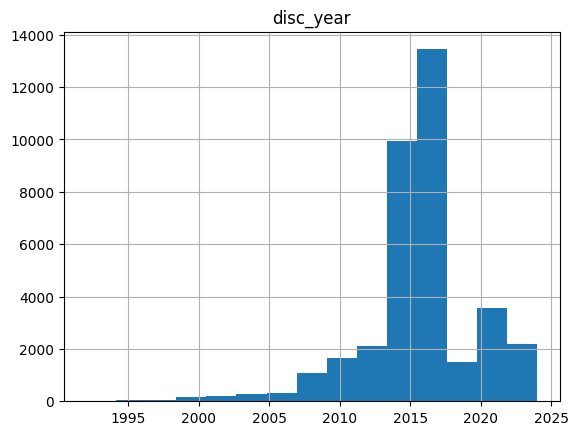

In [24]:
df.hist("disc_year", bins = 15);

On trouve sur ce premier graphique le nombre d'exoplanetes en fonction de leur année de découverte. Jusqu'au milieu des années 2000, assez peu sont découvertes, mais l'exploitation de nouvelles méthodes a ensuite décuplé le nombre de découvertes annuelles - qui est tout de même variable.

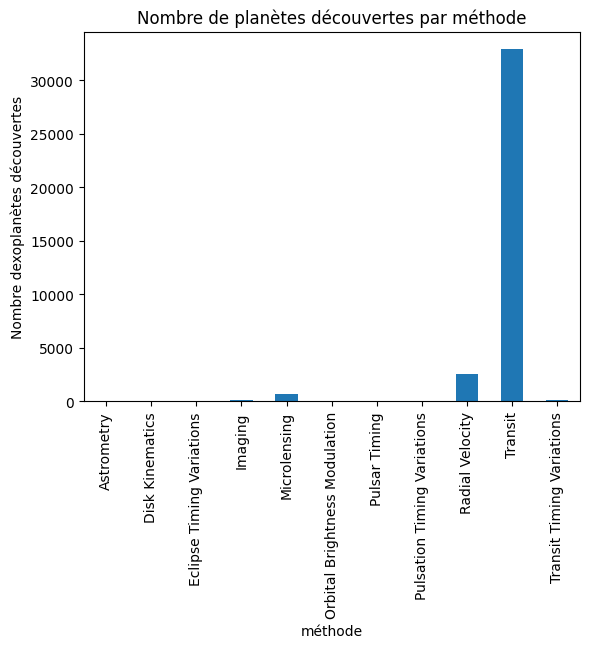

In [19]:
by_method = df.groupby('discoverymethod')
by_method.size()

counts = by_method.size()

counts.plot(kind='bar')

plt.title('Nombre de planètes découvertes par méthode')
plt.xlabel('méthode')
plt.ylabel('Nombre dexoplanètes découvertes')
plt.xticks(rotation=90)

# Affichage
plt.show()
#sns.relplot(data=df, x='total_bill', y='tip', col='time', row='day', hue='sex', size='size', style='smoker',);

On commence par compter le nombre de découvertes par type de méthode pour clarifier notre compréhension des graphiques suivants. La méthode de transit est de loin la plus utilisée, et suivent ensuite la méthode des vitersses radiales et celle de microlensing.

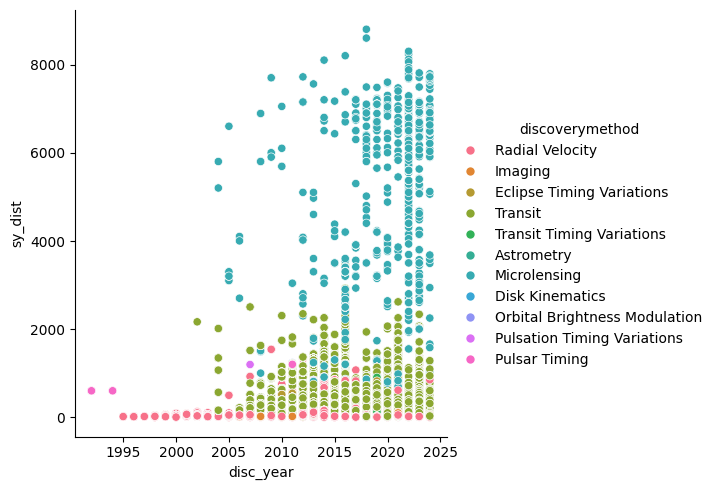

In [12]:
sns.relplot(data=df, x='disc_year', y='sy_dist', hue='discoverymethod');

On a tracé sur ce deuxième graphique la distance Terre-planète n fonction de l'année de découverte, pensant à première vue que les planètes plus proches seraient découvertes en premier. C'est plutôt le cas jusqu'en 2005, où les méthodes de transit et de microlensing apparaissent : chacune permet de détecter un certain type de planète, plus proches pour le transit et jusqu'à de bien plus grandes distances que les autres méthodes pour le microlensing. 

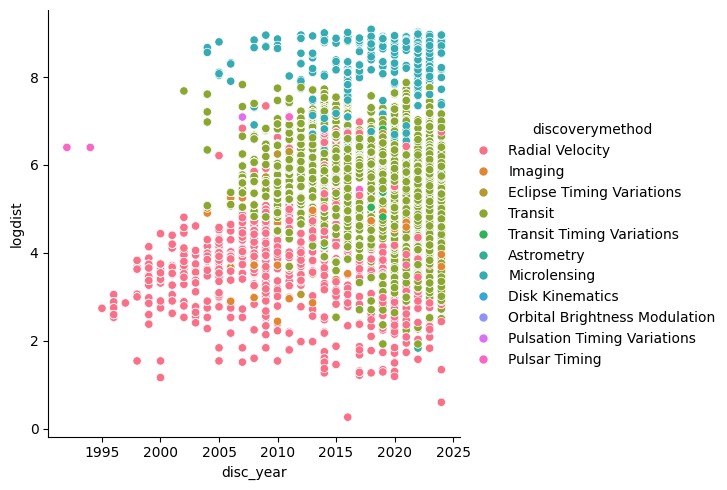

In [14]:
df['logdist']=np.log(df['sy_dist'])
sns.relplot(data=df, x='disc_year', y='logdist', hue='discoverymethod');

On trace à nouveau le graphique précédent mais en échelle logartithmique. En effet, le graphe précédent négligeait certaines valeurs qui étaient assez proches, notament celles découvertes par méthode des vitesses radiales, et exagérait celles découvertes par microlensing.
On retrouve différents groupements par méthode de découverte : d'abord la méthode des vitesses raidales avec de petites distances, puis le transit et le microlensing pour de plus grandes distances.



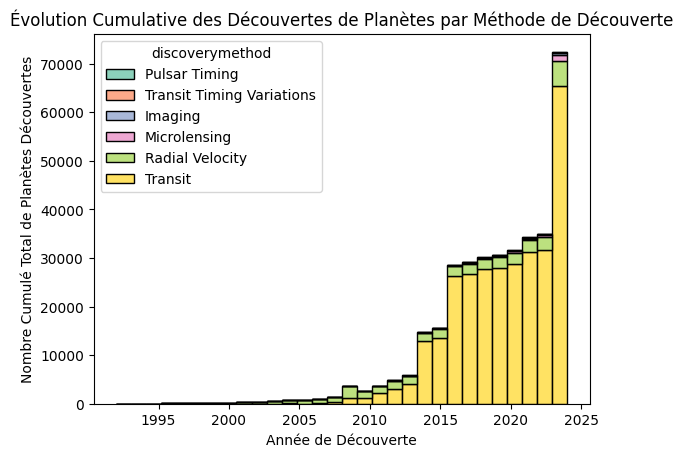

In [30]:
data = pd.read_csv('cleaned_data.csv')

by_year_and_method = data.groupby(['disc_year', 'discoverymethod'])
data_counts = by_year_and_method.size().reset_index(name='discoveries')

by_method = data_counts.groupby('discoverymethod')
data_counts['cumulative_discoveries'] = by_method['discoveries'].cumsum()

last_year_counts = data_counts[data_counts['disc_year'] == data_counts['disc_year'].max()]

sorted_methods = last_year_counts.sort_values('cumulative_discoveries')['discoverymethod'].tolist()

plt.figure()
sns.histplot(data=data_counts, x="disc_year", weights="cumulative_discoveries", hue="discoverymethod",
             hue_order=sorted_methods, multiple="stack", palette="Set2", bins=30)

plt.xlabel("Année de Découverte")
plt.ylabel("Nombre Cumulé Total de Planètes Découvertes")
plt.title("Évolution Cumulative des Découvertes de Planètes par Méthode de Découverte")

plt.show()

Voici un graphique similaire comment les méthodes ont permis de participer à la découverte totale des exoplanètes: par exemple en 2010, la méthode des vitesses radiales et transit avaient permis de découvrir autant de planètes en cummulatif. 

La méthode des vitesse radiales est en fait une mesure d'effet Doppler, qui apparait lorsque la planète fait "bouger" l'étoile. Dans ce cas, l'étoile se rapproche et s'éloigne de nous et l'on perçoit un changement de fréquence reçue. 
On peut donc s'attendre à ce que les planètes proches de nous et avec un grande vitesse radiale soient le plus détectées par cette méthode. On trace donc le graphe suivant.

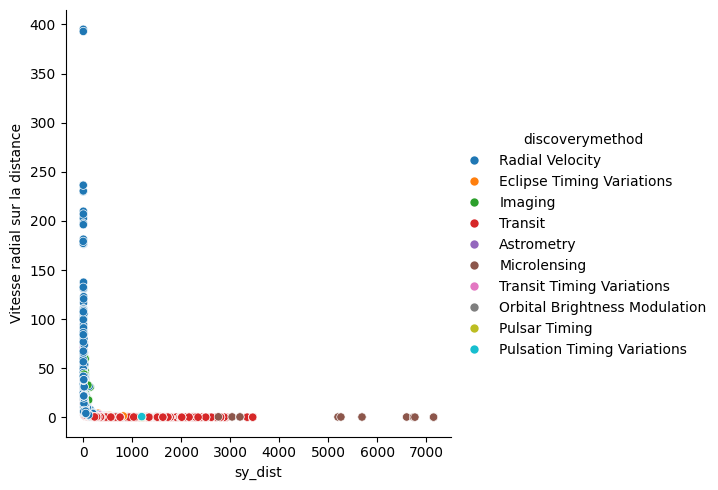

In [22]:
df['Vitesse radial sur la distance']= df['pl_orbper']/df['pl_orbsmax']/df['sy_dist']
sns.relplot(data=df[df['Vitesse radial sur la distance']<4000],x='sy_dist', y='Vitesse radial sur la distance', hue='discoverymethod');

On supprime certaines valeurs aberantes (qui sont une poignée) pour avoir un graphique parlant.

La vitesse radiale sur la distance est en fait la vitesse radiale "apparente" depuis la terre. On voit sur le graphique que c'est pour de faibles distances et de grandes vitesses radiales apparentes que cette méthode fonctionne le mieux, c'est conforme à nos prévisions !

Text(0.5, 1.0, 'Masse*sin(i) en fonction de la période orbitale')

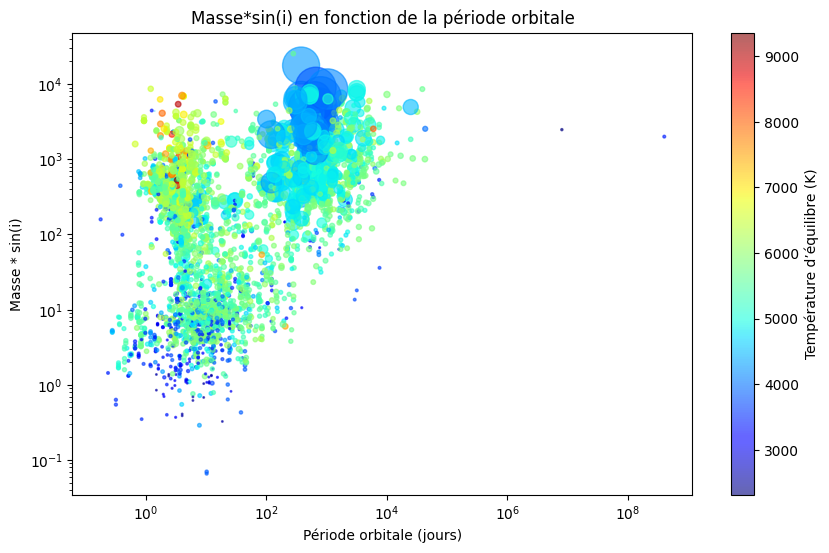

In [25]:
plt.figure(figsize=(10, 6))
mask = df['st_teff'] < 15000

newdf= df[ df['st_teff']<10000]

scatter = plt.scatter(
    newdf['pl_orbper'], 
    newdf['pl_bmasse'], 
    c=newdf['st_teff'], 
    s=newdf['st_rad']*10,  # Multiplier pour ajuster la taille
    alpha=0.6, 
    cmap='jet'
)

# Ajouter une barre de couleur
plt.colorbar(scatter, label='Température d’équilibre (K)')
plt.xscale('log')
plt.yscale('log')
# Ajouter des labels et un titre
plt.xlabel('Période orbitale (jours)')
plt.ylabel('Masse * sin(i)')
plt.title('Masse*sin(i) en fonction de la période orbitale')

Température (caractérisée par les couleurs): Cluster de couleurs chaudes : les températures les plus élevées caractérisent les planètes les plus lourdes et de période orbitale plus faible
Taille de la planète (caractérisée par la grosseur des points) : les planètes les plus grosses possèdent une période orbitale plus importante. 

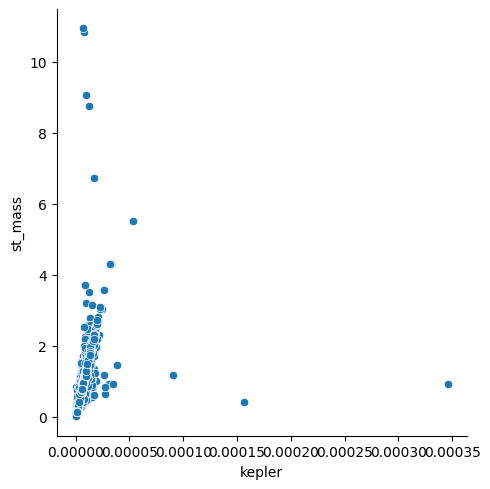

In [28]:
df['kepler'] = (df['pl_orbsmax']**3)/((df['pl_orbper'])**2)
sns.relplot(data=df, x='kepler', y='st_mass')

Ce graphique est simplement une tentative de vérification de la troisième loi de Kepler qui relie la masse de l'astre attracteur, la période orbitale et le demi grand-axe.
On trouve une droite sur 50 000 points et quelques valeurs aberantes : la loi est bienvérifiée !